# 《数据可视化》—— 基于Python的应用

## 第4章 数据的探索性分析

### 第4章思维导图 
<img src="./Fig/Mind4.png" width="1000">

### 4.1 数据的描述分析

In [1]:
import pandas as pd
BSdata=pd.read_excel('DaPy_data.xlsx','BSdata'); #BSdata  #读取数据

### 4.1.1 计数据汇总分析

In [2]:
T1=BSdata['性别'].value_counts();T1 

男    27
女    25
Name: 性别, dtype: int64

In [ ]:
T1/sum(T1)*100

### 4.1.2 计量数据汇总分析

In [ ]:
X=BSdata.身高;

In [ ]:
X.mean()

In [ ]:
X.median()

In [ ]:
R=X.max()-X.min();R

（4）方差

In [ ]:
X.var() 

（5）标准差

In [ ]:
X.std() 

（6）四分位数间距（IQR）                     

In [ ]:
X.quantile(0.75)-X.quantile(0.25) 

（7）偏度

In [ ]:
X.skew() 

In [ ]:
X.kurt()

### 4.1.3 汇总性统计量

In [ ]:
BSdata.describe()   #默认为计算计量数据的基本统计量

In [ ]:
#BSdata[['性别','开设','课程','软件']].describe() #计数数据统计

> 自编计算基本统计量函数

In [ ]:
def stats(x): 
    stat=[x.count(),x.mean(),x.std(),x.min(),x.quantile(.25),x.median(), x.quantile(.75),x.max(),x.skew(),x.kurt()] 
    stat=pd.Series(stat,index=['count','mean','std','Min', '25%','50%','75%', 'max','skew','kurt'])
    return(stat) 

In [ ]:
stats(BSdata.身高)

In [ ]:
stats(BSdata.支出)

### 4.2 数据的直观分析

#### 4.2.1 常用的绘图函数

In [3]:
#绘制图形时，须作一些基本设置
%config InlineBackend.figure_format='retina'   #提高图形显示的清晰度

#### 4.2.1.1  计数数据统计图 

In [4]:
X=['A','B','C','D','E','F','G'] 
Y=[1,4,7,3,2,5,6] 

- 条图（bar） 

In [5]:
import matplotlib.pyplot as plt     #加载基本绘图包

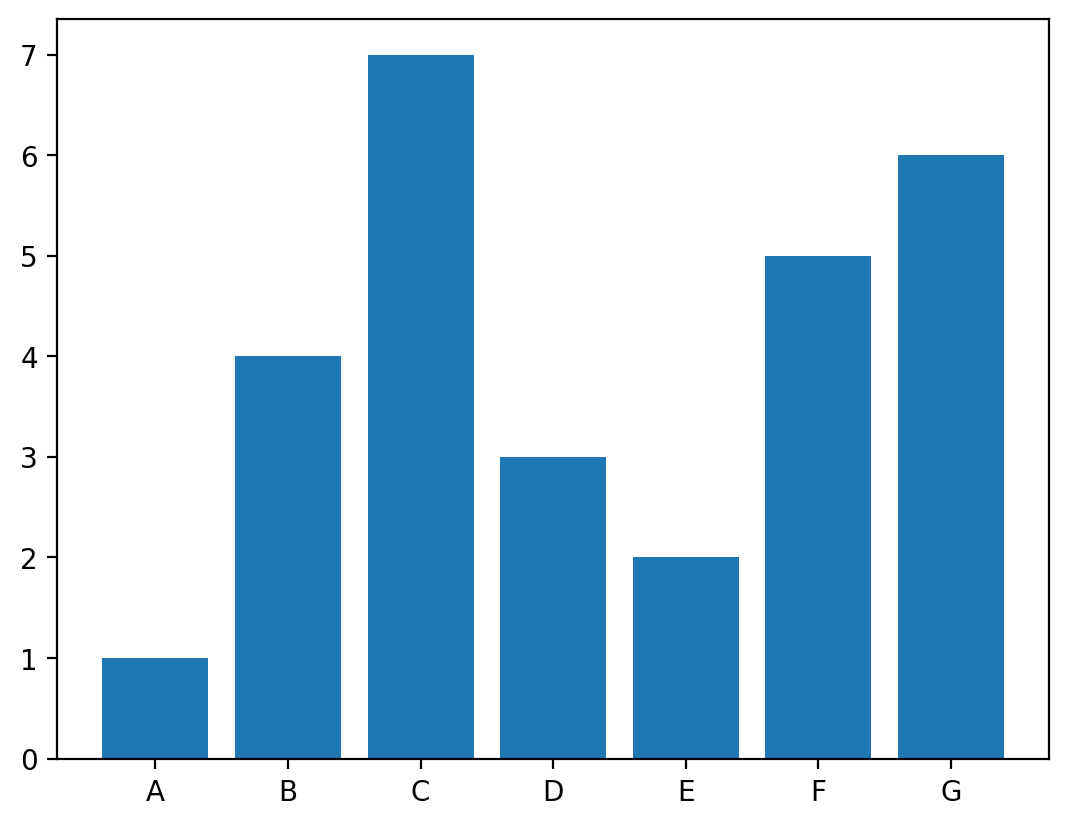

In [6]:
plt.bar(X,Y);

- 饼图（pie） 

In [ ]:
plt.pie(Y,labels=X); 

#### 4.2.1.2  计量数据统计图

- 线图（plot）

In [ ]:
plt.plot(X,Y);

- 直方图（hist） 

In [ ]:
plt.hist(BSdata.身高)    #频数直方图 ，默认density=False

In [ ]:
plt.hist(BSdata.体重)    #频率直方图 ，density=True

- 散点图（scatter） 

In [ ]:
plt.scatter(BSdata.身高, BSdata.体重); 

#### 4.2.1.3  图形参数的设置 

> 标题、标签、标尺及颜色

In [ ]:
plt.plot(X,Y);                      #控制图形的颜色colors，c='red' 为红色

In [ ]:
plt.plot(X,Y,c='red');                      #控制图形的颜色colors，c='red' 为红色
plt.ylim(0,8); 
plt.rcParams['font.sans-serif']=['SimHei'];  #设置中文黑体 
plt.xlabel('姓名'); plt.ylabel('取值');  #plt.xlabel、plt.ylabel：设置坐标轴名称；

> 线型和符号 

In [ ]:
plt.plot(X,Y, linestyle=':', marker='o'); 
# linestyle：控制连线的线型（-: 实线，--: 虚线，.: 点线）；
# marker：控制符号的类型，例如，'o' 绘制实心圆点图。

> 绘图函数附加图形 

In [ ]:
plt.plot(X,Y,'o--');
plt.axvline(x=4);  # 水平线：在横坐标x处画水平（plt.axhline）
plt.axhline(y=4);  # 垂直线：在纵坐标y处画垂直线（plt.axvline）

> 文字函数：text(x, y, labels,...)，在(x, y)处添加用 labels 指定的文字

In [ ]:
plt.plot(X,Y,'o--');
plt.axvline(x=4);  # 水平线：在横坐标x处画水平（plt.axhline）
plt.axhline(y=4);  # 垂直线：在纵坐标y处画垂直线（plt.axvline）
plt.text(2, 7, ' peak point');

> 图例：绘制图形后，可使用 legend 函数给图形加图例

In [ ]:
plt.plot(X,Y,'.', label='point'); plt.legend();

> 误差线图

In [ ]:
s=[0.1,0.4,0.7,0.3,0.2,0.5,0.6]   #误差值
plt.plot(X,Y); plt.errorbar(X,Y,yerr=s,fmt='o',capsize=4);  

> 误差条图

In [ ]:
plt.bar(X,Y,yerr=s,capsize=4);   #kw={'capsize':4}

#### 4.2.1.4 多图的排列与绘制

In [ ]:
plt.subplot(121); plt.bar(X,Y); 
plt.subplot(122); plt.plot(Y);

In [ ]:
plt.subplot(211); plt.bar(X,Y);
plt.subplot(212); plt.plot(Y);

In [ ]:
根据页面大小绘制两个图形

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,6))  
ax[0].bar(X,Y); ax[1].plot(X,Y);

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(10,8)) 
ax[0,0].bar(X,Y)
ax[0,1].pie(Y,labels=X)
ax[1,0].plot(Y); 
ax[1,1].plot(Y,'.-',linewidth=3);

### 4.2.2 基于 pandas 的绘图

#### 4.2.2.1 计量数据统计图 

In [ ]:
plt.rcParams['font.sans-serif']=['SimHei'];  #设置中文黑体 
BSdata['体重'].plot(kind='line'); #线图

In [ ]:
BSdata['体重'].plot(kind='hist'); #直方图

In [ ]:
stats(BSdata.体重)

In [ ]:
BSdata['体重'].plot(kind='box'); #箱型图

In [ ]:
BSdata['体重'].plot(kind='hist'); 

In [ ]:
BSdata['体重'].plot(kind='density',title='Density'); 

In [ ]:
BSdata[['身高','体重','支出']].plot(subplots=True,layout=(1,3),kind='box',figsize=(10,4)); 

In [ ]:
BSdata[['身高','体重','支出']].plot(subplots=True,layout=(1,3),kind='density',figsize=(10,4)); 

In [ ]:
 BSdata[['身高','体重','支出']].plot(subplots=True,layout=(3,1),kind='density',figsize=(10,6));

#### 4.2.2.2  计数数据统计图

In [ ]:
T1=BSdata['开设'].value_counts();T1
pd.DataFrame({'频数':T1,'频率':T1/T1.sum()*100}) 

In [ ]:
T1.plot(kind='bar'); #T1.sort_values().plot(kind='bar'); 

In [ ]:
T1.plot(kind='pie');

### 4.3 数据的分组分析

#### 4.3.1 一维频数表与图

##### 4.3.1.1 计数数据频数分布 

- （1）value_counts 

In [ ]:
BSdata['开设'].value_counts() 

- （2）自定义计数汇总函数 

In [ ]:
 def tab(x, plot=False): #计数频数表
        f=x.value_counts();f
        s=sum(f);
        p=round(f/s*100, 3); p 
        T1=pd.concat([f,p], axis=1); 
        T1.columns=['例数','构成比'];
        T2=pd.DataFrame({'例数':s,'构成比':100.00}, index=['合计'])
        Tab=T1.append(T2) 
        if plot: 
            fig,ax=plt.subplots(1,2,figsize=(10,4)) 
            ax[0].bar(f.index, f); #条图 
            ax[1].pie(p, labels=p.index, autopct='%1.2f%%');#饼图
        return(round(Tab, 3))

In [ ]:
tab(BSdata.软件,True)

#### 4.3.1.2 计量数据频数分布 

In [ ]:
H_cut=pd.cut(BSdata.身高, bins=10); H_cut  #身高分10组，bins=[150,160,170,180,190,200]

In [ ]:
H_cut.value_counts() #分组再统计 

In [ ]:
H_cut.value_counts().plot(kind='bar');   #将结果画成垂直条图

In [ ]:
BSdata.身高.hist();

In [ ]:
O_cut=pd.cut(BSdata.支出, bins=[0,10,30,100]); #O_cut

In [ ]:
O_cut.value_counts() 

In [ ]:
O_cut.value_counts().plot(kind='bar');

In [ ]:
import numpy as np
def freq(X,bins=10):      #计量数据的频数表与直方图
    H=plt.hist(X,bins);
    a=H[1][:-1]; b=H[1][1:]; f=H[0];    
    p=f/sum(f)*100;p
    cp=np.cumsum(p);cp
    Freq=pd.DataFrame([a,b,f,p,cp])
    Freq.index=['[下限a','上限b)','频数f','频率p(%)','累计频数cp(%)']
    return(round(Freq.T,2))

In [ ]:
freq(BSdata.体重) 

### 4.3.2 二维集聚表与图

#### 4.3.2.1 计数数据的列联表 

In [ ]:
#Pandas的crosstab()函数可以把双变量分类数据整理成二维表形式
pd.crosstab(BSdata.开设, BSdata.课程)

In [ ]:
#行和列的合计可使用参数 margins=True
pd.crosstab(BSdata.开设, BSdata.课程, margins=True) 

In [ ]:
#normalize ='index'表示各数据占行的比例
pd.crosstab(BSdata.开设, BSdata.课程, margins=True, normalize='index') 

In [ ]:
#normalize ='columns'表示各数据占列的比例
pd.crosstab(BSdata.开设, BSdata.课程, margins=True, normalize='columns') 

In [ ]:
#normalize ='all'，表示各数据占总和的构成比例
pd.crosstab(BSdata.开设, BSdata.课程, margins=True, normalize='all').round(2) 

In [ ]:
T2=pd.crosstab(BSdata.开设, BSdata.课程);T2 

In [ ]:
T2.plot(kind='bar');

In [ ]:
#stacked 参数设置为False时，作出的是分段式条形图；为True时，作出的是并列式条形图
T2.plot(kind='bar', stacked=True); 

#### 4.3.2.2 计量数据的集聚表 

In [ ]:
# 按列分组 
BSdata.groupby(['性别'])
type(BSdata.groupby(['性别'])) #使用 groupby()函数生成的是一个中间分组变量，为 GroupBy 类型

In [ ]:
# 按分组统计 
BSdata.groupby(['性别'])['身高'].mean() 

In [ ]:
BSdata.groupby(['性别'])['身高'].size() 

In [ ]:
BSdata.groupby(['性别','开设'])['身高'].mean() 

In [ ]:
# 聚集函数 agg() 
BSdata.groupby(['性别'])['身高'].agg([np.mean, np.std]) 

In [ ]:
# 应用函数 apply()
BSdata.groupby(['性别'])['身高','体重'].apply(np.mean) 

In [ ]:
BSdata.groupby(['性别','开设'])['身高','体重'].apply(np.mean) 

### 4.3.3 多维透视表与图

#### 4.3.3.1 计数数据透视表与图

In [ ]:
#pt11=BSdata.pivot_table(values=['学号'],index=['性别'],aggfunc=len)
pt11=BSdata.pivot_table(['学号'],['性别'],aggfunc=len); pt11   #len分组长度

In [ ]:
pt11.plot(kind='bar');

In [ ]:
#pt12=BSdata.pivot_table(values=['学号'],index=['性别','开设'],aggfunc=len)
pt12=BSdata.pivot_table(['学号'],['性别','开设'],aggfunc=len);pt12

In [ ]:
pt12.plot(kind='bar');

In [ ]:
#pt13=BSdata.pivot_table(values=['学号'],index=['开设'],columns=['性别'],aggfunc=len);
pt13=BSdata.pivot_table(['学号'], ['开设'], ['性别'], aggfunc=len); pt13 

In [ ]:
pt13.plot(kind='bar');

In [ ]:
pt13.plot(kind='bar',stacked=True);

#### 4.3.3.2 计量数据透视表与图

In [ ]:
pt21=BSdata.pivot_table(index=['性别'], values=["身高"], aggfunc=np.mean);pt21

In [ ]:
pt21.plot(kind='bar');

In [ ]:
pt22=BSdata.pivot_table(index=['性别'], values=["身高"], aggfunc=[np.mean,np.std]);
pt22

In [ ]:
pt22.iloc[:,0].plot(kind='bar',yerr=pt22.iloc[:,1]); #标准差条图

In [ ]:
pt23=BSdata.pivot_table(index=["性别"], values=["身高","体重"]);pt23 # 默认计算均值 

In [ ]:
pt23.plot(kind='bar');

In [ ]:
pt23.plot(kind='bar',subplots=True,layout=(1,2));

#### 4.3.3.3 复合数据透视表与图

In [ ]:
BSdata.pivot_table('学号', ['性别','开设'], '课程', aggfunc=len,  
                   margins=True, margins_name='合计')

In [ ]:
pt31=BSdata.pivot_table('学号',['性别','开设'],'课程',aggfunc=len)
pt31

In [ ]:
pt31.plot(kind='bar',stacked=False);

In [ ]:
pt32=BSdata.pivot_table(['身高','体重'],['性别',"开设"],aggfunc=[len,np.mean,np.std]);pt32

In [ ]:
pt32.iloc[:,:2].plot(kind='bar'); 

In [ ]:
pt32.iloc[:,2:4].plot(kind='bar');

In [ ]:
pt32.iloc[:,4:6].plot(kind='bar');

In [ ]:
pt32.iloc[:,2].plot(kind='bar', yerr=pt32.iloc[:,4]); #基于性别和开设的体重标准差条图